In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('C:/Users/Arpit Kadam/Desktop/Insurance-Fraud-Detection/data/insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [199]:
data['fraud_reported'].isna().sum()

0

In [166]:
data.replace('?', np.nan, inplace = True)

In [167]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [169]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [14]:
%cd C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\Visualization-Images

C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\Visualization-Images


c:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


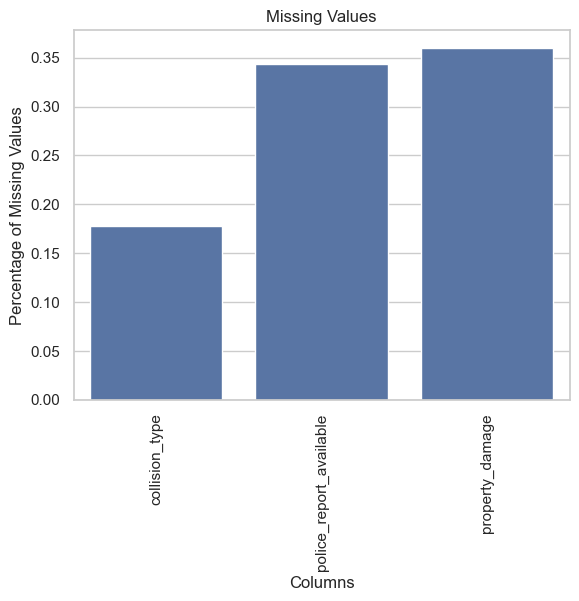

In [15]:
missing = data.isnull().sum() / len(data) # perncentage 
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns=['Null_Count']
missing.index.names=['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Col_Name',y='Null_Count',data=missing)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.savefig('missing_values.png')
plt.show()

In [170]:
data['collision_type'].value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [17]:
data['property_damage'].value_counts()


NO     338
YES    302
Name: property_damage, dtype: int64

In [18]:
data['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [171]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0]) 

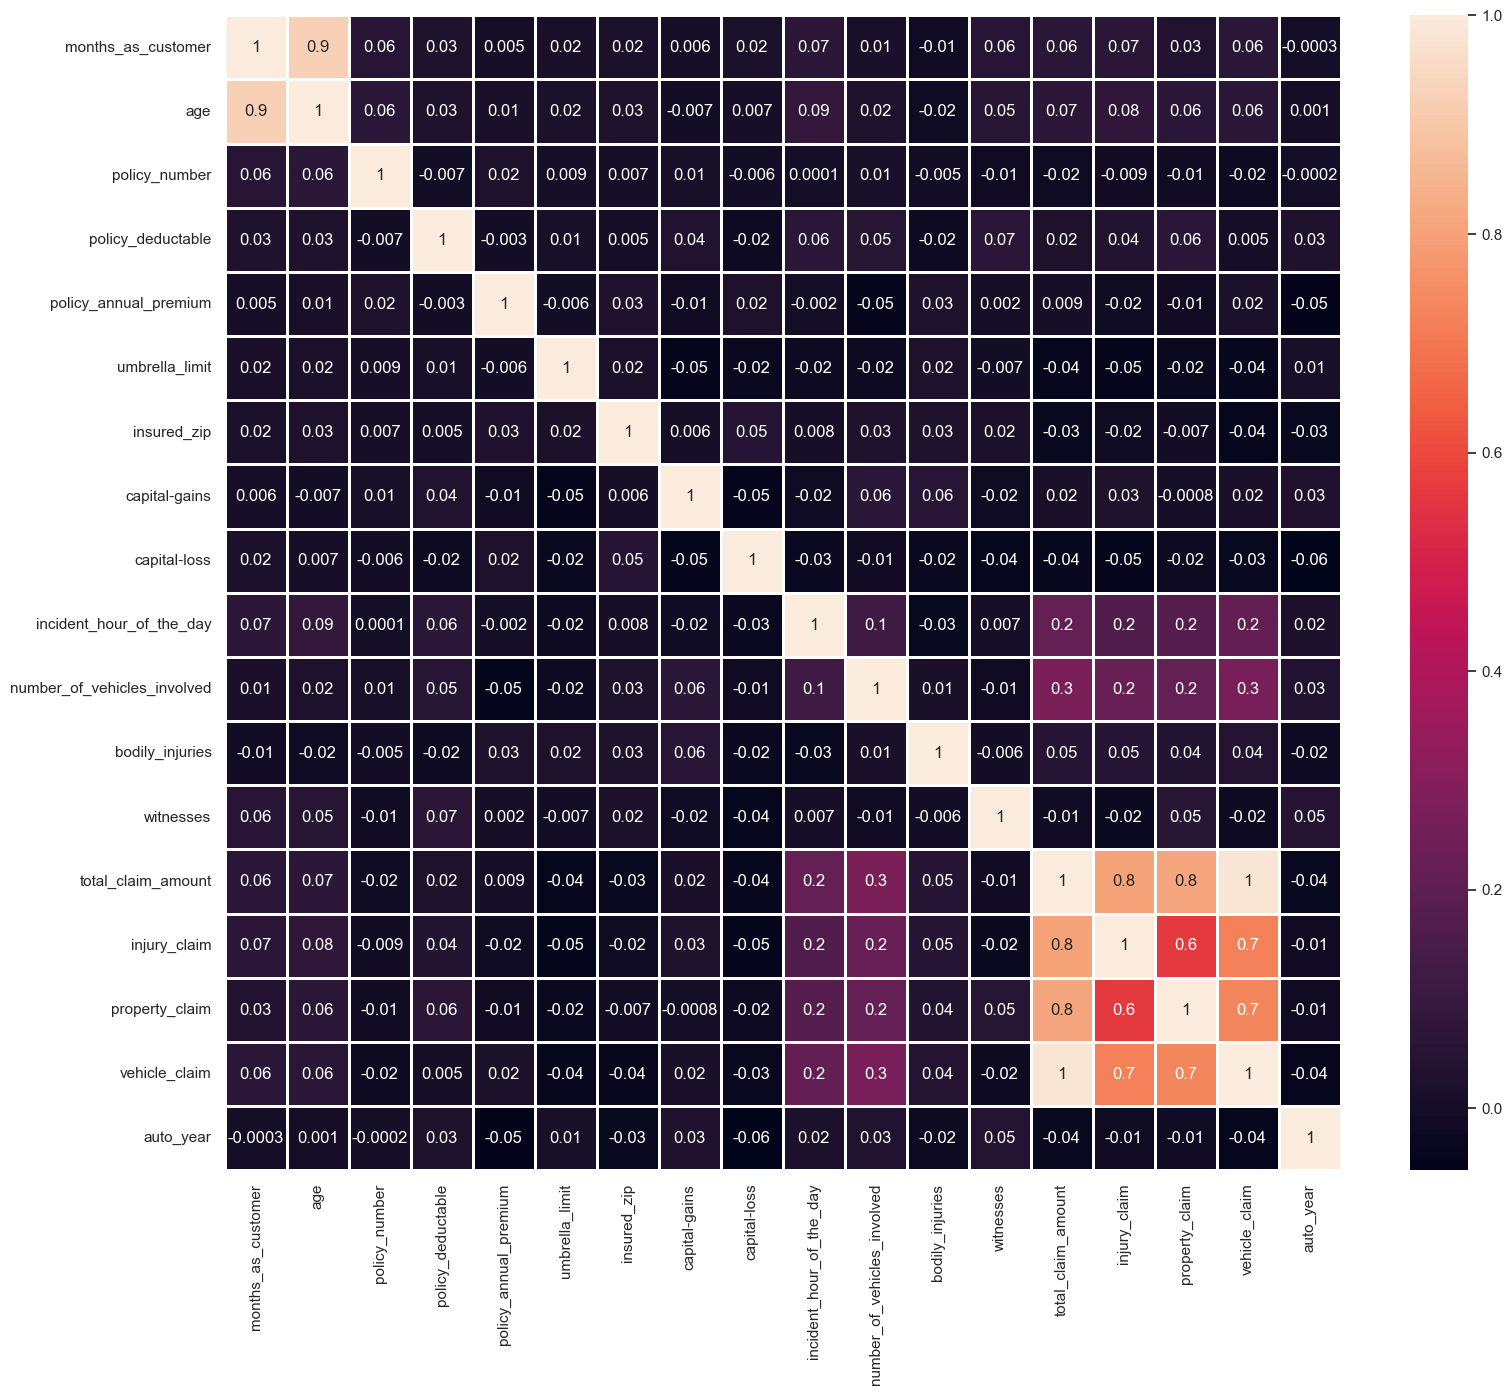

In [172]:
plt.figure(figsize = (18, 15))

corr = data.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 2)
plt.show()

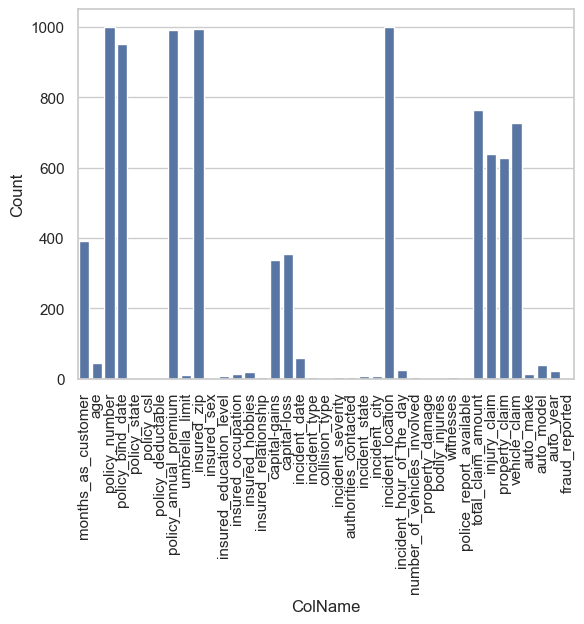

In [160]:
unique = data.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

In [173]:
unique.sort_values(by='Count',ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [174]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

data.drop(to_drop, inplace = True, axis = 1)
print(data.columns)

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')


In [175]:
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [27]:
data.shape

(1000, 27)

C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_10104\878019017.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


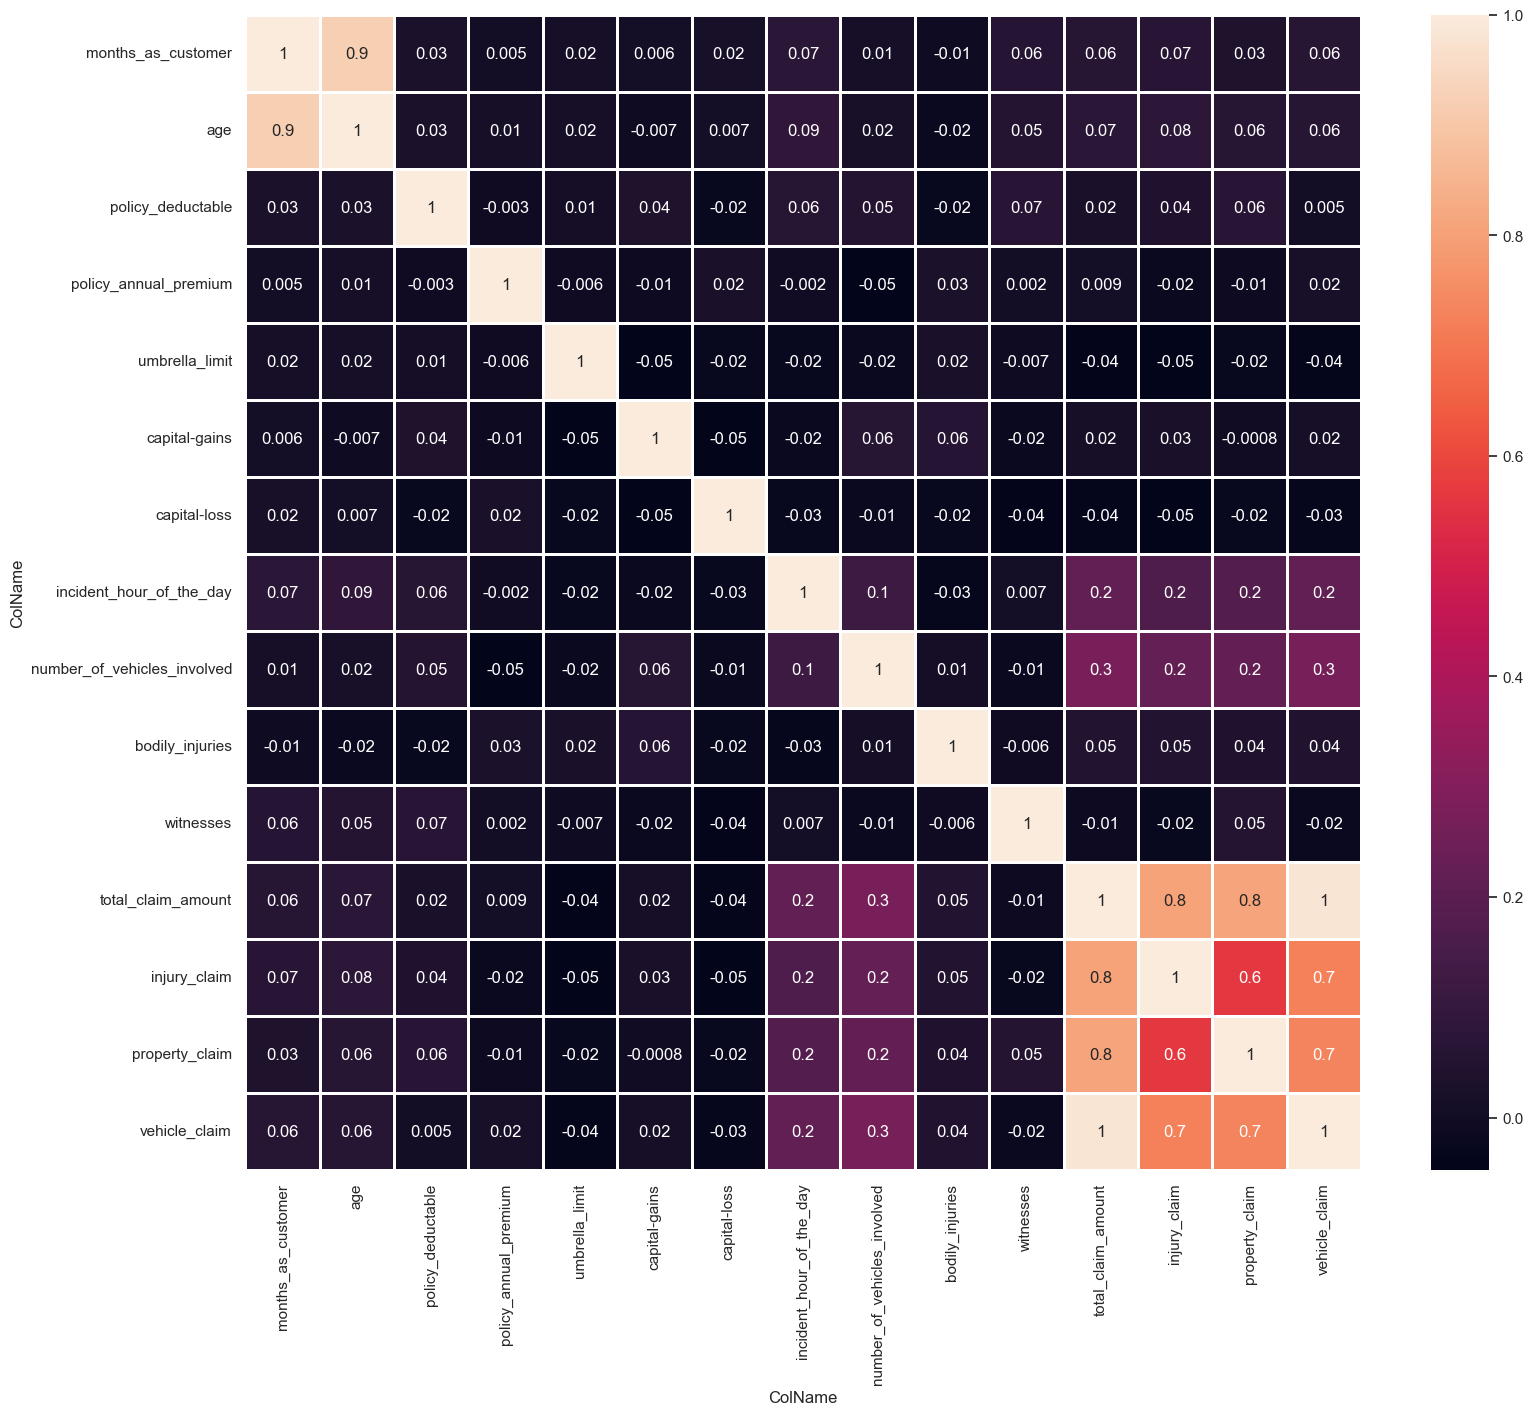

In [28]:
plt.figure(figsize = (18, 15))

corr = data.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 2)
plt.show()

In [176]:
data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [177]:
data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N


In [182]:
data['fraud_reported'] = data['fraud_reported'].map({'Y': 1, 'N': 0}).astype(int)
data['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [183]:
x = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [184]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [185]:
x.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [186]:
categorical_cols = x.select_dtypes(include = ['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first = True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0


In [196]:
numerical_col = x.select_dtypes(include = ['int64', 'int32'])
x = pd.concat([numerical_col, categorical_cols], axis = 1)

In [188]:
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0


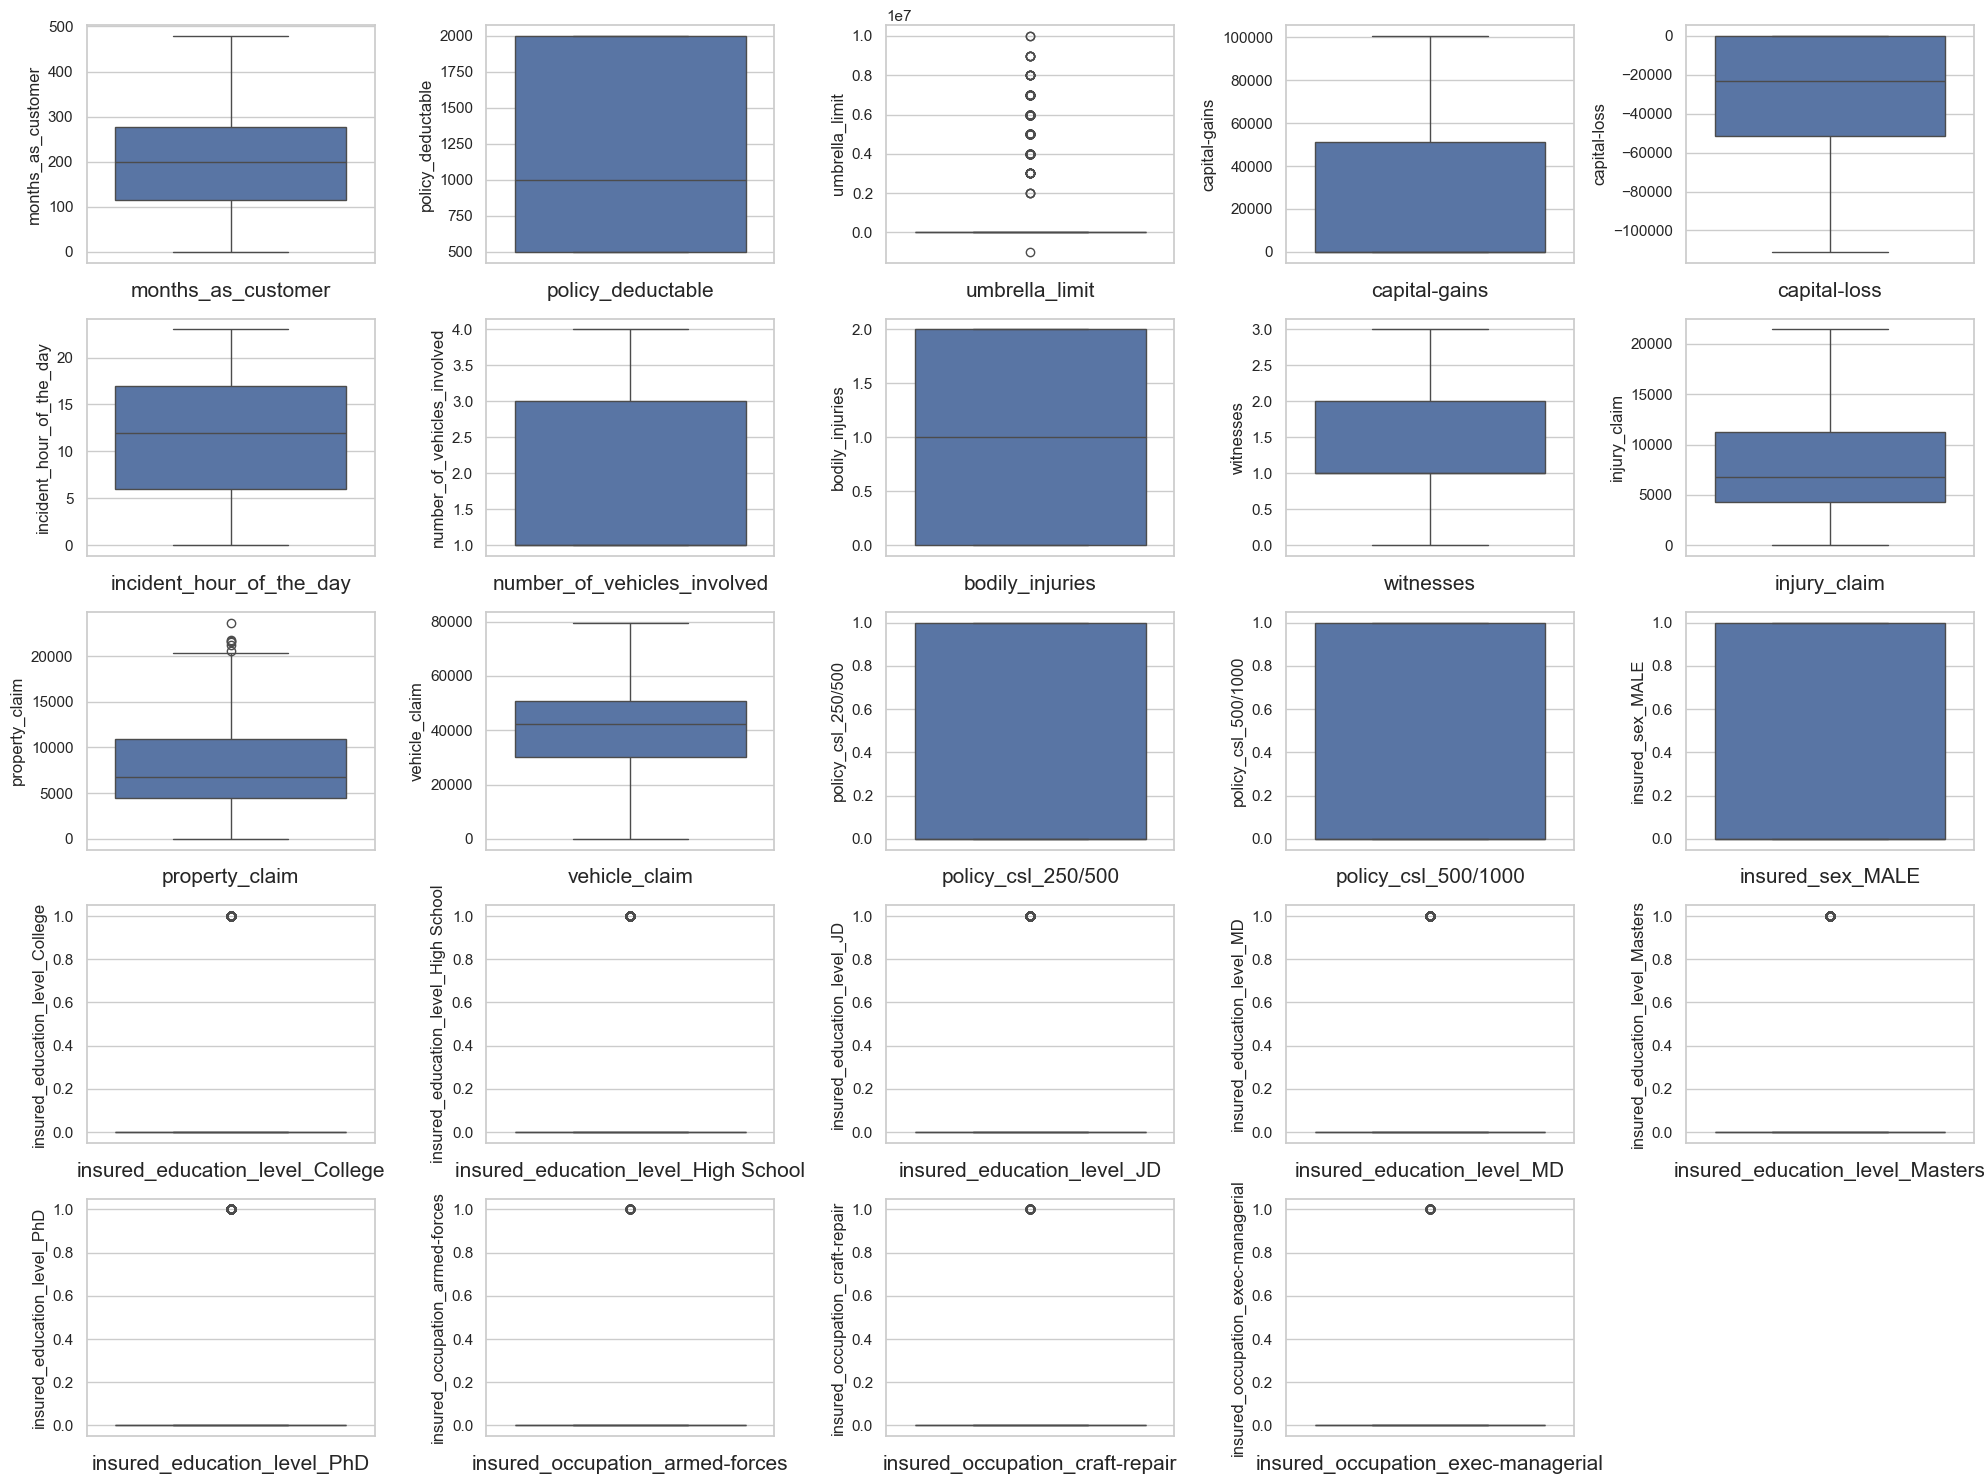

In [56]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in x.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [189]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [59]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
541,239,1000,7000000,51400,-6300,22,1,0,2,1660,830,8300,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
440,108,2000,0,0,0,14,1,0,2,6370,6370,44590,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0
482,116,500,0,0,-35500,8,3,0,3,6630,6630,46410,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
422,8,500,0,0,0,21,1,0,0,14040,14040,63180,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
778,161,2000,0,60200,0,0,3,2,2,5040,15120,40320,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1


In [190]:
numerical_data = x_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [192]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = x_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
541,0.257024,-0.230540,2.581616,0.907981,0.745342,1.468375,-0.815526,-1.223442,0.492253,-1.226042,-1.395255,-1.628037
440,-0.885443,1.391349,-0.477615,-0.913479,0.971519,0.322646,-0.815526,-1.223442,0.492253,-0.261765,-0.247396,0.314596
482,-0.815674,-1.041484,-0.477615,-0.913479,-0.302969,-0.536651,1.156385,-1.223442,1.375785,-0.208535,-0.193526,0.412022
422,-1.757555,-1.041484,-0.477615,-0.913479,0.971519,1.325159,-0.815526,-1.223442,-1.274810,1.308513,1.341787,1.309734
778,-0.423223,1.391349,-0.477615,1.219826,0.971519,-1.682381,1.156385,1.219951,0.492253,-0.534055,1.565557,0.086019


In [193]:
x_train.drop(columns = scaled_num_df.columns, inplace = True)

In [194]:
x_train = pd.concat([scaled_num_df, x_train], axis = 1)

In [66]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
541,0.257024,-0.230540,2.581616,0.907981,0.745342,1.468375,-0.815526,-1.223442,0.492253,-1.226042,-1.395255,-1.628037,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
440,-0.885443,1.391349,-0.477615,-0.913479,0.971519,0.322646,-0.815526,-1.223442,0.492253,-0.261765,-0.247396,0.314596,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0
482,-0.815674,-1.041484,-0.477615,-0.913479,-0.302969,-0.536651,1.156385,-1.223442,1.375785,-0.208535,-0.193526,0.412022,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
422,-1.757555,-1.041484,-0.477615,-0.913479,0.971519,1.325159,-0.815526,-1.223442,-1.274810,1.308513,1.341787,1.309734,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
778,-0.423223,1.391349,-0.477615,1.219826,0.971519,-1.682381,1.156385,1.219951,0.492253,-0.534055,1.565557,0.086019,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1


In [72]:
import warnings
warnings.filterwarnings('ignore')


SVC

In [73]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train, svc_model.predict(x_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",svc_model_train_acc)
print("Testing Accuracy: ", svc_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.8628571428571429
Testing Accuracy:  0.7333333333333333
[[220   0]
 [ 80   0]]
              precision    recall  f1-score   support

           N       0.73      1.00      0.85       220
           Y       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define SVC model
svc = SVC()

# Define parameter grid
grid_params_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=grid_params_svc, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

svc_model_hyper = grid_search.best_estimator_

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

y_pred = svc_model_hyper.predict(x_test)

svc_model_hyper_train_acc = accuracy_score(y_train, svc_model_hyper.predict(x_train))
svc_model_hyper_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",svc_model_hyper_train_acc)
print("Testing Accuracy: ", svc_model_hyper_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.8300000000000001
Training Accuracy:  0.8557142857142858
Testing Accuracy:  0.31333333333333335
[[ 18 202]
 [  4  76]]
              precision    recall  f1-score   support

           0       0.82      0.08      0.15       220
           1       0.27      0.95      0.42        80

    accuracy                           0.31       300
   macro avg       0.55      0.52      0.29       300
weighted avg       0.67      0.31      0.22       300



KNeighborsClassifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(x_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",knn_model_train_acc)
print("Testing Accuracy: ", knn_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.7614285714285715
Testing Accuracy:  0.7333333333333333
[[220   0]
 [ 80   0]]
              precision    recall  f1-score   support

           N       0.73      1.00      0.85       220
           Y       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier model
knn = KNeighborsClassifier()

# Parameter grid
grid_params_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Minkowski power parameter
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=knn, param_grid=grid_params_knn, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

knn_model_hyper = grid_search.best_estimator_

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

y_pred = knn_model_hyper.predict(x_test)

knn_model_hyper_train_acc = accuracy_score(y_train, knn_model_hyper.predict(x_train))
knn_model_hyper_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",knn_model_hyper_train_acc)
print("Testing Accuracy: ", knn_model_hyper_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.7628571428571428
Training Accuracy:  0.7771428571428571
Testing Accuracy:  0.73
[[215   5]
 [ 76   4]]
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       220
           1       0.44      0.05      0.09        80

    accuracy                           0.73       300
   macro avg       0.59      0.51      0.47       300
weighted avg       0.66      0.73      0.64       300



In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# KNeighborsClassifier model
knn = KNeighborsClassifier()

# Parameter distribution
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Minkowski power parameter
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=knn, 
    param_distributions=param_dist_knn, 
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy', 
    cv=5, 
    verbose=1, 
    n_jobs=-1, 
    random_state=42  # For reproducibility
)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best model
knn_model_random_hyper = random_search.best_estimator_

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Make predictions
y_pred = knn_model_random_hyper.predict(x_test)

# Calculate accuracies
knn_model_random_hyper_train_acc = accuracy_score(y_train, knn_model_random_hyper.predict(x_train))
knn_model_random_hyper_test_acc = accuracy_score(y_test, y_pred)

# Print results
print("Training Accuracy:", knn_model_random_hyper_train_acc)
print("Testing Accuracy:", knn_model_random_hyper_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 13, 'metric': 'manhattan'}
Best Accuracy: 0.7628571428571428
Training Accuracy: 1.0
Testing Accuracy: 0.74
[[217   3]
 [ 75   5]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       220
           1       0.62      0.06      0.11        80

    accuracy                           0.74       300
   macro avg       0.68      0.52      0.48       300
weighted avg       0.71      0.74      0.65       300



DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

y_pred = decision_tree_model.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(x_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ",decision_tree_model_train_acc)
print("Test accuracy: ",decision_tree_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.4033333333333333
[[ 87 133]
 [ 46  34]]
              precision    recall  f1-score   support

           N       0.65      0.40      0.49       220
           Y       0.20      0.42      0.28        80

    accuracy                           0.40       300
   macro avg       0.43      0.41      0.38       300
weighted avg       0.53      0.40      0.43       300



In [124]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [2, 5, 10]    
}


grid_search = GridSearchCV(decision_tree_model, grid_params, cv = 5, n_jobs = -1, verbose = 1, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_leaf=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [125]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8171428571428571


In [126]:
decision_tree_model = grid_search.best_estimator_
y_pred = decision_tree_model.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(x_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {decision_tree_model_train_acc}")
print(f"Test accuracy of Decision Tree is : {decision_tree_model_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.82
Test accuracy of Decision Tree is : 0.6966666666666667
[[153  67]
 [ 24  56]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       220
           1       0.46      0.70      0.55        80

    accuracy                           0.70       300
   macro avg       0.66      0.70      0.66       300
weighted avg       0.76      0.70      0.71       300



In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# DecisionTreeClassifier model
dt = DecisionTreeClassifier(random_state=42)

# Parameter distributions
param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],           # Splitting criteria
    'max_depth': [3, 5, 10, 15, 20, None],                 # Depth of the tree
    'min_samples_split': [2, 5, 10, 20],                   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10],                     # Minimum samples per leaf node
    'max_features': [None, 'sqrt', 'log2'],                # Features to consider for splitting
    'splitter': ['best', 'random']                         # Splitting strategy
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=dt, 
    param_distributions=param_dist_dt, 
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy', 
    cv=5,       # 5-fold cross-validation
    verbose=1, 
    n_jobs=-1, 
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV
random_search.fit(x_train, y_train)

# Get the best model
dt_model_random_hyper = random_search.best_estimator_

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Make predictions
y_pred = dt_model_random_hyper.predict(x_test)

# Calculate accuracies
dt_model_random_hyper_train_acc = accuracy_score(y_train, dt_model_random_hyper.predict(x_train))
dt_model_random_hyper_test_acc = accuracy_score(y_test, y_pred)

# Print results
print("Training Accuracy:", dt_model_random_hyper_train_acc)
print("Testing Accuracy:", dt_model_random_hyper_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'splitter': 'random', 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 3, 'criterion': 'entropy'}
Best Accuracy: 0.82
Training Accuracy: 0.82
Testing Accuracy: 0.79
[[185  35]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       220
           1       0.60      0.65      0.62        80

    accuracy                           0.79       300
   macro avg       0.73      0.75      0.74       300
weighted avg       0.80      0.79      0.79       300



RandomForestClassifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_train_acc = accuracy_score(y_train, rf_model.predict(x_train))
rf_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ", rf_model_train_acc)
print("Test accuracy: ", rf_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  0.9985714285714286
Test accuracy:  0.7333333333333333
[[199  21]
 [ 59  21]]
              precision    recall  f1-score   support

           N       0.77      0.90      0.83       220
           Y       0.50      0.26      0.34        80

    accuracy                           0.73       300
   macro avg       0.64      0.58      0.59       300
weighted avg       0.70      0.73      0.70       300



In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Parameter grid for GridSearchCV
grid_params_rf = {
    'n_estimators': [50, 100, 200, 300],          # Number of trees
    'max_depth': [10, 20, 30, None],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5],               # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None],      # Features to consider for splits
    'bootstrap': [True, False]                   # Use bootstrap sampling
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=rf, param_grid=grid_params_rf, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and estimator
rf_model_hyper_grid = grid_search.best_estimator_

# Print best parameters and score
print("Best Parameters (GridSearch):", grid_search.best_params_)
print("Best Accuracy (GridSearch):", grid_search.best_score_)

y_pred = rf_model_hyper_grid.predict(x_test)

rf_model_hyper_grid_train_acc = accuracy_score(y_train, rf_model_hyper_grid.predict(x_train))
rf_model_hyper_grid_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:", rf_model_hyper_grid_train_acc)
print("Testing Accuracy:", rf_model_hyper_grid_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters (GridSearch): {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy (GridSearch): 0.8142857142857143
Training Accuracy: 0.9742857142857143
Testing Accuracy: 0.72
[[187  33]
 [ 51  29]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       220
           1       0.47      0.36      0.41        80

    accuracy                           0.72       300
   macro avg       0.63      0.61      0.61       300
weighted avg       0.70      0.72      0.71       300



AdaBoostClassifier

In [95]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(estimator = decision_tree_model)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada_model, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_depth=3,
                                                                           min_samples_leaf=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [96]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
0.8171428571428571


In [98]:
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(x_test) 

In [99]:
ada_train_acc = accuracy_score(y_train, ada_model.predict(x_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.82
Test accuracy of Ada Boost is : 0.6966666666666667
[[153  67]
 [ 24  56]]
              precision    recall  f1-score   support

           N       0.86      0.70      0.77       220
           Y       0.46      0.70      0.55        80

    accuracy                           0.70       300
   macro avg       0.66      0.70      0.66       300
weighted avg       0.76      0.70      0.71       300



GradientBoostingClassifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(x_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(x_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(x_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9485714285714286
Test Accuracy of Gradient Boosting Classifier is 0.42 

Confusion Matrix :- 
[[ 64 156]
 [ 18  62]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.78      0.29      0.42       220
           Y       0.28      0.78      0.42        80

    accuracy                           0.42       300
   macro avg       0.53      0.53      0.42       300
weighted avg       0.65      0.42      0.42       300



In [139]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# GradientBoostingClassifier model
gb = GradientBoostingClassifier(random_state=42)

# Parameter distribution for RandomizedSearchCV
param_dist_gb = {
    'n_estimators': np.arange(50, 501, 50),                  # Random search over 50-500 boosting stages
    'learning_rate': np.logspace(-2, 0, 10),                  # Random search over [0.01 to 1.0] in log scale
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=gb, 
    param_distributions=param_dist_gb, 
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy', 
    cv=5, 
    verbose=1, 
    n_jobs=-1, 
    random_state=42  # For reproducibility
)

# Fit the model
random_search.fit(x_train, y_train)

# Best model from RandomizedSearch
gb_model_random_hyper = random_search.best_estimator_

# Print best parameters and score
print("Best Parameters (RandomizedSearch):", random_search.best_params_)
print("Best Accuracy (RandomizedSearch):", random_search.best_score_)

y_pred = gb_model_random_hyper.predict(x_test)
gb_model_random_hyper_train_acc = accuracy_score(y_train, gb_model_random_hyper.predict(x_train))
gb_model_random_hyper_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:", gb_model_random_hyper_train_acc)
print("Testing Accuracy:", gb_model_random_hyper_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters (RandomizedSearch): {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.046415888336127774}
Best Accuracy (RandomizedSearch): 0.8014285714285714
Training Accuracy: 0.9971428571428571
Testing Accuracy: 0.7366666666666667
[[169  51]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       220
           1       0.50      0.65      0.57        80

    accuracy                           0.74       300
   macro avg       0.68      0.71      0.69       300
weighted avg       0.76      0.74      0.75       300



Stochastic Gradient Boosting

In [102]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(x_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(x_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(x_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.9442857142857143
Test Accuracy of Stochastic Gradient Boosting is 0.5366666666666666 

Confusion Matrix :- 
[[110 110]
 [ 29  51]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.79      0.50      0.61       220
           Y       0.32      0.64      0.42        80

    accuracy                           0.54       300
   macro avg       0.55      0.57      0.52       300
weighted avg       0.66      0.54      0.56       300



XGB

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [104]:
y_test = le.fit_transform(y_test)

In [106]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train) 

y_pred = xgb.predict(x_test) 

In [107]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(x_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.7033333333333334
[[197  23]
 [ 66  14]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       220
           1       0.38      0.17      0.24        80

    accuracy                           0.70       300
   macro avg       0.56      0.54      0.53       300
weighted avg       0.65      0.70      0.66       300



In [108]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_depth=3,
                                                                           min_samples_leaf=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [109]:
xgb = grid_search.best_estimator_

y_pred = xgb.predict(x_test) 

In [110]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(x_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))    

Training accuracy of XgBoost is : 0.82
Test accuracy of XgBoost is : 0.6966666666666667
[[153  67]
 [ 24  56]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       220
           1       0.46      0.70      0.55        80

    accuracy                           0.70       300
   macro avg       0.66      0.70      0.66       300
weighted avg       0.76      0.70      0.71       300



CatBoostClassifier

In [111]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5524486	total: 346ms	remaining: 3.12s
1:	learn: 0.4336423	total: 355ms	remaining: 1.42s
2:	learn: 0.3729369	total: 411ms	remaining: 960ms
3:	learn: 0.3513731	total: 422ms	remaining: 632ms
4:	learn: 0.3309599	total: 431ms	remaining: 431ms
5:	learn: 0.3086513	total: 439ms	remaining: 292ms
6:	learn: 0.2897035	total: 487ms	remaining: 209ms
7:	learn: 0.2730141	total: 497ms	remaining: 124ms
8:	learn: 0.2587506	total: 507ms	remaining: 56.3ms
9:	learn: 0.2426134	total: 515ms	remaining: 0us


In [112]:
cat_acc = accuracy_score(y_test, cat.predict(x_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(x_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(x_test))}")

Training Accuracy of Cat Boost Classifier is 0.9157142857142857
Test Accuracy of Cat Boost Classifier is 0.69 

Confusion Matrix :- 
[[180  40]
 [ 53  27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       220
           1       0.40      0.34      0.37        80

    accuracy                           0.69       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.67      0.69      0.68       300



ExtraTreesClassifier

In [113]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train) 

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(x_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(x_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(x_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.7266666666666667 

Confusion Matrix :- 
[[197  23]
 [ 59  21]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       220
           1       0.48      0.26      0.34        80

    accuracy                           0.73       300
   macro avg       0.62      0.58      0.58       300
weighted avg       0.69      0.73      0.70       300



VotingClassifier

In [114]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc_model), ('knn_model', knn_model),  ('Decision Tree', decision_tree_model), ('Random Forest', rf_model),
               ('Ada Boost', ada_model), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(x_train, y_train)

y_pred = vc.predict(x_test)

Learning rate set to 0.5
0:	learn: 0.5524486	total: 9.79ms	remaining: 88.1ms
1:	learn: 0.4336423	total: 16.1ms	remaining: 64.5ms
2:	learn: 0.3729369	total: 21.4ms	remaining: 50ms
3:	learn: 0.3513731	total: 32ms	remaining: 48ms
4:	learn: 0.3309599	total: 40.3ms	remaining: 40.3ms
5:	learn: 0.3086513	total: 47.1ms	remaining: 31.4ms
6:	learn: 0.2897035	total: 52.7ms	remaining: 22.6ms
7:	learn: 0.2730141	total: 61.9ms	remaining: 15.5ms
8:	learn: 0.2587506	total: 68.4ms	remaining: 7.59ms
9:	learn: 0.2426134	total: 77.4ms	remaining: 0us


In [115]:
vc_train_acc = accuracy_score(y_train, vc.predict(x_train)) 
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.92
Test accuracy of Voting Classifier is : 0.7566666666666667
[[193  27]
 [ 46  34]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       220
           1       0.56      0.42      0.48        80

    accuracy                           0.76       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.74      0.76      0.75       300



In [144]:
models = pd.DataFrame({
    'Model' : ['svc_model', 'knn_model', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'XgBoost', 'Voting Classifier', 'SVC_Model_hyper', 'knn_model_hyper', 'knn_model_random_hyper', 'dt_model_random_hyper', 'rf_model_hyper_grid', 'gb_model_random_hyper'],
    'Test Accuracy Score' : [svc_model_test_acc, knn_model_test_acc, decision_tree_model_test_acc, rf_model_test_acc, ada_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, xgb_test_acc, vc_test_acc, svc_model_hyper_test_acc, knn_model_hyper_test_acc, knn_model_random_hyper_test_acc, dt_model_random_hyper_test_acc, rf_model_hyper_grid_test_acc, gb_model_random_hyper_test_acc],
    'Training Accuracy Score' : [svc_model_train_acc, knn_model_train_acc, decision_tree_model_train_acc, rf_model_train_acc, ada_train_acc, gb_acc, sgb_acc, cat_acc, etc_acc, xgb_train_acc, vc_train_acc, svc_model_hyper_train_acc, knn_model_hyper_train_acc, knn_model_random_hyper_train_acc, dt_model_random_hyper_train_acc, rf_model_hyper_grid_train_acc, gb_model_random_hyper_train_acc]
})


models.sort_values(by = 'Test Accuracy Score', ascending = False)

,Model,Test Accuracy Score,Training Accuracy Score
14,dt_model_random_hyper,0.790000,0.820000
10,Voting Classifier,0.756667,0.920000
13,knn_model_random_hyper,0.740000,1.000000
16,gb_model_random_hyper,0.736667,0.997143
1,knn_model,0.733333,0.761429
0,svc_model,0.733333,0.862857
3,Random Forest,0.733333,0.998571
12,knn_model_hyper,0.730000,0.777143
8,Extra Trees,0.726667,0.726667
15,rf_model_hyper_grid,0.720000,0.974286


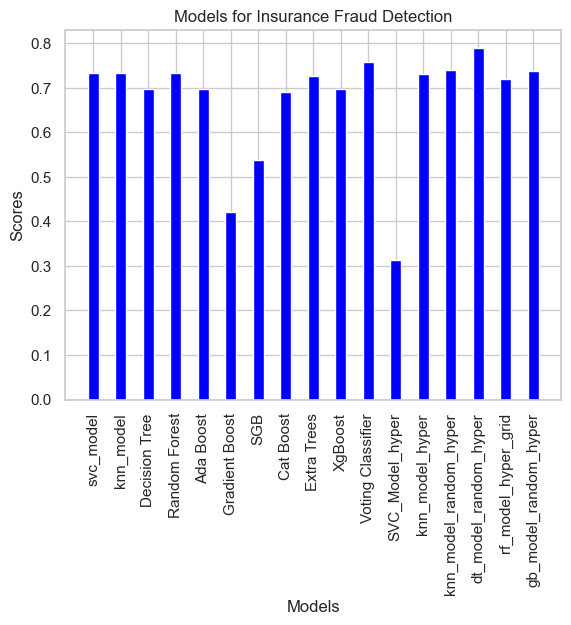

In [153]:
plt.bar(models['Model'],models['Test Accuracy Score'], width=0.4, color='blue')
plt.xlabel("Models")
plt.xticks(rotation=90)
plt.ylabel("Scores")
plt.title("Models for Insurance Fraud Detection")
plt.savefig("Models_for_Insurance_Fraud_Detection.png")
plt.show()

So the final model selected will be dt_model_random_hyper

In [151]:
text_file_path = "C:/Users/Arpit Kadam/Desktop/Insurance-Fraud-Detection/research/Research-Text-Files/Research2.txt"

with open(text_file_path, "w") as file:
    file.write("So the final model selected will be Decision Tree Model with Random Search Hyperparameter Tuning\n")
    file.write(f"Training Accuracy: {dt_model_random_hyper_train_acc}\n")
    file.write(f"Testing Accuracy: {dt_model_random_hyper_test_acc}\n")
    file.write("""
Best Parameters: {'splitter': 'random', 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 3, 'criterion': 'entropy'}
Best Accuracy: 0.82
               
Training Accuracy: 0.82
Testing Accuracy: 0.79
               
Confusion Matrix:
[[185  35]
[ 28  52]]
               
Classification Report:
            precision    recall  f1-score   support

        0       0.87      0.84      0.85       220
        1       0.60      0.65      0.62        80

accuracy                            0.79        300
macro avg       0.73      0.75      0.74       300
weighted avg    0.80      0.79      0.79       300
""")
    file.close()
